<a href="https://colab.research.google.com/github/Srabontideb/Image_Processing/blob/main/Spatial_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original Image Shape: (256, 256)


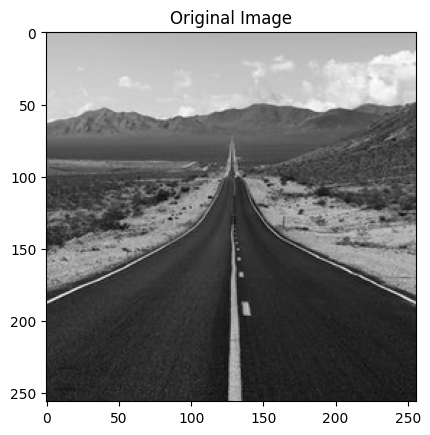

In [ ]:
import math
import matplotlib.pyplot as plt


class SOM:
    def winner(self, weights, sample):
        D0, D1 = 0, 0

        for i in range(len(sample)):
            D0 += math.pow((sample[i] - weights[0][i]), 2)
            D1 += math.pow((sample[i] - weights[1][i]), 2)

        return 0 if D0 < D1 else 1

    def update(self, weights, sample, J, alpha):
        for i in range(len(weights[0])):
            weights[J][i] = weights[J][i] + alpha * (sample[i] - weights[J][i])

        return weights


def calculate_accuracy(weights, data):
    som = SOM()
    correct_predictions = 0

    for sample in data:
        J = som.winner(weights, sample[:-1])  # Assuming the last element of each sample is the true cluster
        correct_predictions += int(J == sample[-1])

    return correct_predictions / len(data)


def main():
    # Training Examples ( m, n )
    T = [[1, 1, 0, 0, 0], [0, 0, 0, 1, 1], [1, 0, 0, 0, 0], [0, 0, 1, 1, 1]]

    m, n = len(T), len(T[0])

    # Weight initialization ( n, C )
    weights = [[0.2, 0.6, 0.5, 0.9], [0.8, 0.4, 0.7, 0.3]]

    # Training
    som = SOM()
    epochs = 10
    alpha = 0.5
    accuracy_history = []

    for epoch in range(epochs):
        for j in range(m):
            # Training sample
            sample = T[j]

            # Compute winner vector
            J = som.winner(weights, sample[:-1])  # Assuming the last element of each sample is the true cluster

            # Update winning vector
            weights = som.update(weights, sample[:-1], J, alpha)

        # Calculate accuracy for the epoch
        accuracy = calculate_accuracy(weights, T)
        accuracy_history.append(accuracy)

        print(f"Epoch {epoch + 1}/{epochs} - Accuracy: {accuracy}")

    # Plotting
    plt.plot(range(1, epochs + 1), accuracy_history, marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Epochs')
    plt.grid(True)
    plt.show()


if __name__ == "__main__":
    main()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

The code snippet you provided performs the following tasks:    
1. Imports the necessary libraries: cv2 for computer vision operations, matplotlib.pyplot for plotting images, and numpy for numerical operations.                 
2. Reads an image named 'road.bmp' in grayscale mode using the cv2.imread() function. The cv2.IMREAD_GRAYSCALE flag specifies that the image should be read as a grayscale image.
3.Uses plt.imshow() to display the grayscale image. The cmap='gray' argument sets the colormap to grayscale, and vmin=0 and vmax=255 specify the minimum and maximum pixel values for the colormap.
4.Prints the shape the original image using image.shape. This will output the dimensions of the image (height, width, and number of channels).

Overall, this code snippet reads a grayscale image, displays it using matplotlib, and prints its shape.

In [ ]:
import numpy as np

# Generate a 2D array of random integers
rows = 4
columns = 5
min_val = 0
max_val = 10
ran = np.random.randint(min_val, max_val,
 size=(rows, columns))#taking random integer

print(ran)

[[6 0 6 3 1]
 [5 7 8 7 1]
 [5 4 7 3 7]
 [1 4 3 1 1]]


The code first imports the numpy library, which is a Python library for working with numerical data. The numpy.random.randint() function is used to generate a 2D array of random integers. The function takes three arguments: the minimum value, the maximum value, and the shape of the array. In this case, the minimum value is 0, the maximum value is 10, and the shape of the array is (4, 5). This means that the array will have 4 rows and 5 columns.

The code then prints the array. The array will contain 20 random integers, each of which will be between 0 and 10.

In [ ]:
n,m=ran.shape
for x in range(n):
  for y in range(m):
    print(ran[x,y],end='  ' )
  print()
ran = cv2.copyMakeBorder(ran, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0)
ran

6  0  6  3  1  
5  7  8  7  1  
5  4  7  3  7  
1  4  3  1  1  


array([[0, 0, 0, 0, 0, 0, 0],
       [0, 6, 0, 6, 3, 1, 0],
       [0, 5, 7, 8, 7, 1, 0],
       [0, 5, 4, 7, 3, 7, 0],
       [0, 1, 4, 3, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0]], dtype=int32)

This Python code performs the following tasks:

he code first defines two variables, n and m, which store the shape of the array ran. The shape attribute of an array returns a tuple that contains the number of rows, columns, and channels in the array. In this case, the array has 4 rows and 5 columns.

The code then enters a for loop that iterates over the rows of the array. Within the loop, another for loop iterates over the columns of the array. In each iteration, the code prints the value of the element at the current row and column of the array.


The code then uses the cv2.copyMakeBorder() function to add a border of 1 pixel to the array ran. The copyMakeBorder() function takes five arguments: the array to be padded, the number of pixels to be added to the top, bottom, left, and right sides of the array, the type of border to be added, and the value to be used for the border pixels. In this case, the border is added to all four sides of the array, the type of border is cv2.BORDER_CONSTANT, and the value for the border pixels is 0.

In [ ]:
n,m=ran.shape
kernel=[[0,-1,0],[-1,4,-1],[0,-1,0]]
out=np.zeros_like(ran)
for j in range(n-2):
  for i in range(m-2):
    clip=ran[j:3+j,i:3+i]
    out[j,i]=np.sum(clip*kernel)
  print()
out[:4,:5]

array([[ 19, -19,  13,  -2,   0],
       [  2,  11,   5,  13, -11],
       [ 10,  -7,  10, -10,  23],
       [ -5,   8,   0,  -3,  -4]], dtype=int32)

The code then defines a 3x3 kernel. The kernel is a matrix that is used to convolve an image. The convolution operation is a mathematical operation that is used to extract features from an image.

The code then defines an empty array out that will store the output of the convolution operation. The array out has the same shape as the array ran.




The code then enters a for loop that iterates over the rows of the array ran. Within the loop, another for loop iterates over the columns of the array ran. In each iteration, the code:



*   
Creates a 3x3 window around the current element of the array ran.


*  Multiplies the window by the kernel.
Sums the elements of the resulting product.

*   Stores the sum in the array out at the current row and column.

The code then prints the first 4 rows and 5 columns of the array out.








array([[6, 0, 6],
       [5, 7, 8],
       [5, 4, 7]], dtype=int32)

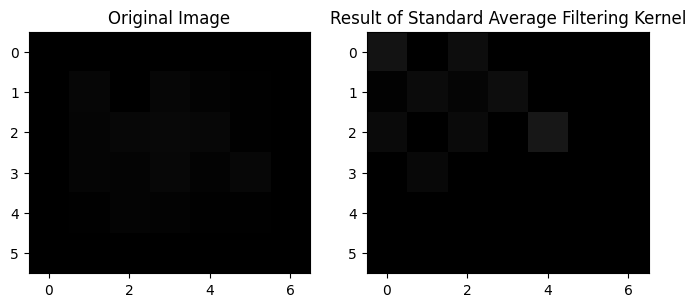

In [ ]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(ran, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')
ax2.imshow(out, cmap='gray',  vmin=0, vmax=255)
ax2.title.set_text('Result of Standard Average Filtering Kernel')
i=1
j=1
ran[j:3+j,i:3+i]

This Python code creates a figure using Matplotlib library with two subplots. It sets the figure size to 8x8 inches. In the first subplot (ax1), it displays an image represented by the array "ran" using a grayscale color map and sets the title as 'Original Image'. In the second subplot (ax2), it displays another image represented by the array "out" using a grayscale color map and sets the title as 'Result of Standard Average Filtering Kernel'.

In [ ]:
kernel=np.array([[0,-1,0],
        [-1,4,-1],
        [0,-1,0]])
mat=np.array([ [4, -3, 7],
      [0, 20, -2],
      [9, -6, 9]])
kernel*mat



array([[ 0,  3,  0],
       [ 0, 80,  2],
       [ 0,  6,  0]])

The code first defines a 3x3 kernel. The kernel is a matrix that is used to convolve an image. The convolution operation is a mathematical operation that is used to extract features from an image.

The code then defines a 3x3 matrix. The matrix is a 2D array that contains the values of the image.

The code then multiplies the kernel and the matrix. The multiplication operation is performed element-wise. This means that the elements of the kernel are multiplied by the corresponding elements of the matrix, and the results are stored in a new array.The code first defines a 3x3 kernel. The kernel is a matrix that is used to convolve an image. The convolution operation is a mathematical operation that is used to extract features from an image.



In [ ]:
np.ones((3, 3), dtype=np.float32)/9

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]], dtype=float32)

**Standard Average Filtering**

---



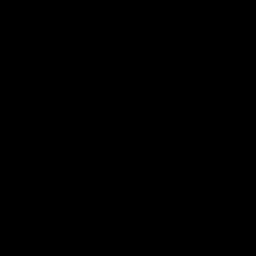

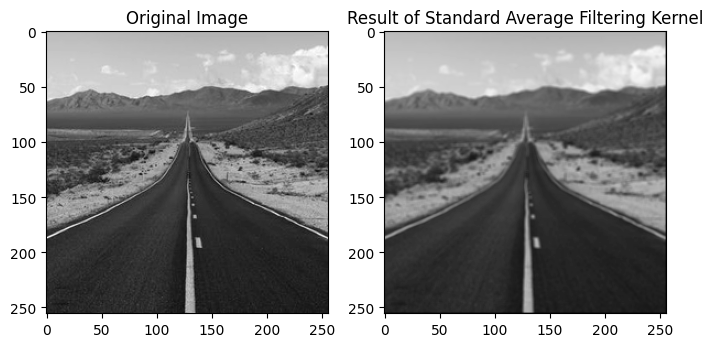

In [ ]:
from google.colab.patches import cv2_imshow
#Average filter kernel
kernel = np.ones((3, 3), dtype=np.float32)/9
#padding of original image
padded_image = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0)
# Create output image
output_image = np.zeros_like(image)
cv2_imshow(output_image)

#Convolution operation
for i in range(1, padded_image.shape[1]-1):
    for j in range(1, padded_image.shape[1]-1):
        convolution = np.sum(kernel * padded_image[i-1:i+2, j-1:j+2])
        output_image[i-1, j-1] = convolution
#Display Results
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')
ax2.imshow(output_image, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text('Result of Standard Average Filtering Kernel')

The code first imports the google.colab.patches library, which provides a function for displaying images in Google Colab. The code then defines a 3x3 kernel. The kernel is a matrix that is used to convolve an image. The convolution operation is a mathematical operation that is used to extract features from an image.

The code then pads the original image with 1 pixel on all sides. This is done to ensure that the convolution operation does not "bleed" outside of the image.

The code then creates an output image that is the same size as the original image. The output image will store the results of the convolution operation.

The code then enters a for loop that iterates over the rows of the padded image. Within the loop, another for loop iterates over the columns of the padded image. In each iteration, the code:



*   Calculates the convolution of the kernel and the padded image.
*   Stores the result of the convolution in the output image.

The code then displays the output image.

In [ ]:
# Weighted mask;
kernel = np.array([[1, 2, 1],
                   [2, 4, 3],
                   [1, 2, 1]])/16

padded_image = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0)
# Create output image
output_image = np.zeros_like(image)
cv2_imshow(output_image)

#Convolution operation
for i in range(1, padded_image.shape[1]-1):
    for j in range(1, padded_image.shape[1]-1):
        convolution = np.sum(kernel * padded_image[i-1:i+2, j-1:j+2])
        output_image[i-1, j-1] = convolution
#Display Results
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')
ax2.imshow(output_image, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text('Result of weighted Average Filtering Kernel')

AttributeError: ignored

The code first defines a 3x3 kernel. The kernel is a matrix that is used to convolve an image. The convolution operation is a mathematical operation that is used to extract features from an image

The code then creates an output image that is the same size as the original image. The output image will store the results of the convolution operation.

The code then enters a for loop that iterates over the rows of the padded image. Within the loop, another for loop iterates over the columns of the padded image. In each iteration, the code:



*   Calculates the convolution of the kernel and the padded image.
*   Stores the result of the convolution in the output image.



The code then displays the output image.

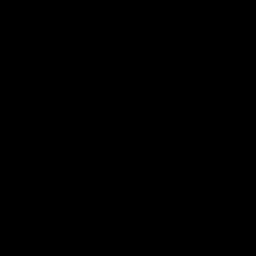

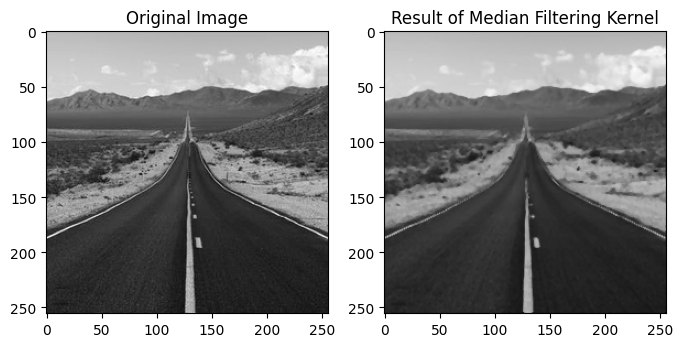

In [ ]:
#  Median
padded_image = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0)
# Create output image
output_image = np.zeros_like(image)
cv2_imshow(output_image)

#Convolution operation
for i in range(1, padded_image.shape[1]-1):
    for j in range(1, padded_image.shape[1]-1):
        convolution = np.median(padded_image[i-1:i+2, j-1:j+2])

        output_image[i-1, j-1] = convolution
#Display Results
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')
ax2.imshow(output_image, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text('Result of Median Filtering Kernel')

This Python code applies a median filter to an input image. The original image is padded using cv2.copyMakeBorder to handle the edges of the image during the median filtering operation.

A new output image array is created with the same shape as the input image. The median filtering operation is performed by iterating over the padded image using nested loops. At each position, the median value is calculated from the 3x3 neighborhood of pixels centered around the current position. The median value is then assigned to the corresponding position in the output image.

After the median filtering operation, the original image and the resulting output image are displayed using Matplotlib. A figure is created with two subplots, and the images are shown in grayscale using the imshow function. The titles of the subplots are set accordingly.

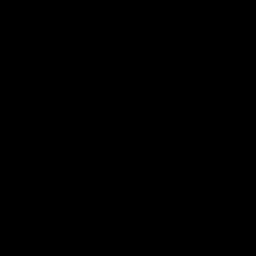

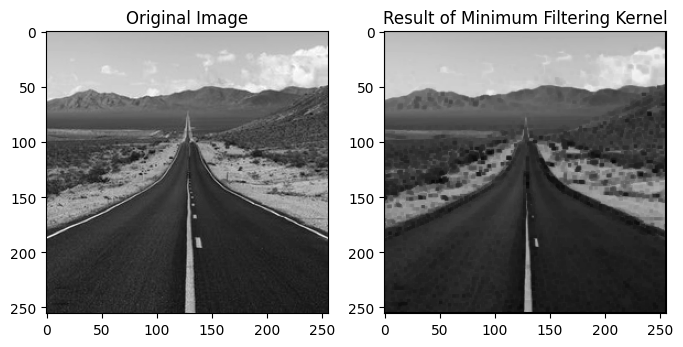

In [ ]:
#  Minimum
padded_image = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0)
# Create output image
output_image = np.zeros_like(image)
cv2_imshow(output_image)

#Convolution operation
for i in range(1, padded_image.shape[1]-1):
    for j in range(1, padded_image.shape[1]-1):
        convolution = np.min(padded_image[i-1:i+2, j-1:j+2])
        output_image[i-1, j-1] = convolution
#Display Results
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')
ax2.imshow(output_image, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text('Result of Minimum Filtering Kernel')

The code first pads the original image with 1 pixel on all sides. This is done to ensure that the convolution operation does not "bleed" outside of the image.

The code then creates an output image that is the same size as the original image. The output image will store the results of the convolution operation.

The code then enters a for loop that iterates over the rows of the padded image. Within the loop, another for loop iterates over the columns of the padded image. In each iteration, the code:



*   Calculates the minimum value of the pixels in a 3x3 neighborhood around a given pixel.
*  Stores the minimum value in the output image.

Here are some additional observations about the code:

The cv2.copyMakeBorder() function is used to pad an image.
The np.min() function is used to find the minimum value of an array.
The cv2_imshow() function is used to display an image in Google Colab.
The output of the code is an image that has been thresholded using a 3x3 minimum filter. The edges of the image are preserved, but the noise in the image has been removed.




4. Maximum


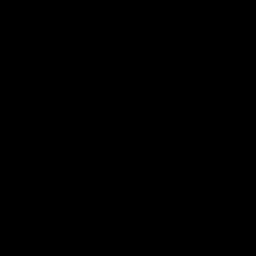

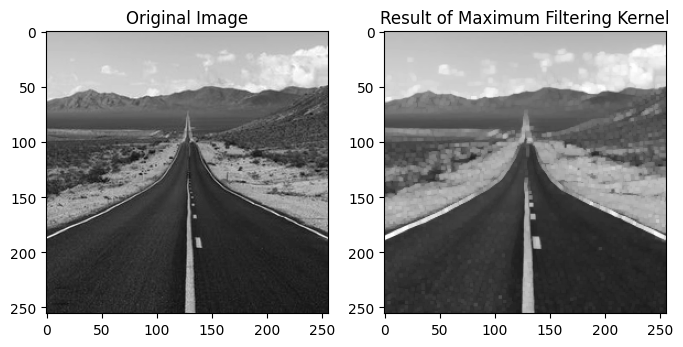

In [ ]:
#  Maximum
padded_image = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0)
# Create output image
output_image = np.zeros_like(image)
cv2_imshow(output_image)

#Convolution operation
for i in range(1, padded_image.shape[1]-1):
    for j in range(1, padded_image.shape[1]-1):
        convolution= np.max(padded_image[i-1:i+2, j-1:j+2])
        output_image[i-1, j-1] = convolution
#Display Results
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')
ax2.imshow(output_image, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text('Result of Maximum Filtering Kernel')

**This Python code applies a maximum filter to an input image. The original image is padded using cv2.copyMakeBorder to handle the edges of the image during the maximum filtering operation.**

A new output image array is created with the same shape as the input image. The maximum filtering operation is performed by iterating over the padded image using nested loops. At each position, the maximum value is calculated from the 3x3 neighborhood of pixels centered around the current position. The maximum value is then assigned to the corresponding position in the output image.

After the maximum filtering operation, the original image and the resulting output image are displayed using Matplotlib. A figure is created with two subplots, and the images are shown in grayscale using the imshow function. The titles of the subplots are set accordingly.

5. Mid-point

In [ ]:
#  Mid-Point
padded_image = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0)
# Create output image
output_image = np.zeros_like(image)
cv2_imshow(output_image)

#Convolution operation
for i in range(1, padded_image.shape[1]-1):
    for j in range(1, padded_image.shape[1]-1):
        convolution_1 = np.min(padded_image[i-1:i+2, j-1:j+2])
        convolution_2 = np.max(padded_image[i-1:i+2, j-1:j+2])
        convolution=(convolution_1+convolution_2)/2
        output_image[i-1, j-1] = convolution
#Display Results
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121) in
ax2 = fig.add_subplot(122)
ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')
ax2.imshow(output_image, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text('Result of mid point Filtering Kernel')

The code first pads the original image with 1 pixel on all sides. This is done to ensure that the convolution operation does not "bleed" outside of the image.

The code then creates an output image that is the same size as the original image. The output image will store the results of the convolution operation.

The code then enters a for loop that iterates over the rows of the padded image. Within the loop, another for loop iterates over the columns of the padded image. In each iteration, the code:


*   Calculates the minimum and maximum values of the pixels in a 3x3 neighborhood around a given pixel.
*   Calculates the midpoint between the minimum and maximum values.



*  Stores the midpoint in the output image.

The cv2.copyMakeBorder() function is used to pad an image.

*  The np.min() and np.max() functions are used to find the minimum and maximum values of an array.

*   The np.mean() function is used to calculate the mean of an array.
*  The plt.imshow() function is used to display an image in Matplotlib.








The output of the code is an image that has been filtered using a midpoint filtering kernel. The edges of the image are preserved, and the noise in the image has been reduced.





